# Fintech Payments Data science
## University of Gloucestershire
### Dessertation 
Muhammad
Date: 21 June 2023

In [70]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
pr = pd.read_csv('data.csv')

In [9]:
#Display first raw 
pr.head()

,Action_ID,Merchant_Category_Code,Action_Type,Payment_Method_Name,Card_Holder_Name,CC_Number,CC_Year_expiry,Captured_Status,Amount,Currency_Symbol,Response_Code,Response_Description,Customer_Email,Is_3DS,Attempt_3DS
0,act_qg6easo5ajzungmpppp2z5l4ey,5815,Refund,VISA,Bruce Wayne,453243******0131,2021,Expired,7.91,GBP,0,Declined,brucewayne@arkham.com,False,False
1,act_zmqw7nrmlb4ujexugx3jh5jstm,5815,Capture,VISA,Bruce Wayne,453243******0131,2026,Authorized,1.97,GBP,10000,Approved,brucewayne@arkham.com,False,False
2,act_u26uxut5pc4ednw3kiwjivkqfm,5815,Capture,VISA,Bruce Wayne,453243******0131,2026,Authorized,2.55,GBP,10000,Approved,brucewayne@arkham.com,False,False
3,act_4jqnybof2vcuric6ofs6oaww7u,5815,Refund,VISA,Bruce Wayne,453243******0131,2026,Insufficient_funds,6.76,GBP,0,Declined,brucewayne@arkham.com,False,False
4,act_t4izgn3jgrsedhuymhcgtec3lq,5815,Refund,VISA,Bruce Wayne,453243******0131,2019,Expired,3.36,GBP,0,Declined,brucewayne@arkham.com,False,False


In [10]:
#check missing values
pr.isnull().sum()

Action_ID                 0
Merchant_Category_Code    0
Action_Type               0
Payment_Method_Name       0
Card_Holder_Name          0
CC_Number                 0
CC_Year_expiry            0
Captured_Status           0
Amount                    0
Currency_Symbol           0
Response_Code             0
Response_Description      0
Customer_Email            0
Is_3DS                    0
Attempt_3DS               0
dtype: int64

In [11]:
#check data types each column
pr.dtypes

Action_ID                  object
Merchant_Category_Code      int64
Action_Type                object
Payment_Method_Name        object
Card_Holder_Name           object
CC_Number                  object
CC_Year_expiry              int64
Captured_Status            object
Amount                    float64
Currency_Symbol            object
Response_Code               int64
Response_Description       object
Customer_Email             object
Is_3DS                       bool
Attempt_3DS                  bool
dtype: object

In [12]:
#stats summary
pr.describe()

,Merchant_Category_Code,CC_Year_expiry,Amount,Response_Code
count,56.0,56.000000,56.000000,56.000000
mean,5815.0,2025.982143,13.444107,6785.714286
std,0.0,3.719683,16.876968,4712.514425
min,5815.0,2014.000000,0.150000,0.000000
25%,5815.0,2025.000000,2.550000,0.000000
50%,5815.0,2026.500000,7.910000,10000.000000
75%,5815.0,2028.250000,10.410000,10000.000000
max,5815.0,2030.000000,48.550000,10000.000000


In [15]:
# Drop unnecessary columns
pr = pr.drop(['Action_ID', 'CC_Number'], axis=1)

In [17]:
#Create new Data frame
Attempt_3DS = pd.DataFrame(pr['Attempt_3DS'])

In [19]:
#Create New Data frame
Response_Code = pd.DataFrame(pr['Response_Code'])

In [20]:
#Create new Data Frame
Captured_Status = pd.DataFrame(pr['Captured_Status'])

In [72]:
#creating new DataFrames for the columns 'Action_Type' and 'Response_Description' from the original DataFrame 'pr'
Action_Type = pd.DataFrame(pr['Action_Type'])
Response_Description = pd.DataFrame(pr['Response_Description'])

pr_new = np.array([Action_Type, Captured_Status, Response_Description, Response_Code, Attempt_3DS])

In [25]:
# Create a boolean mask where each 'True' indicates an approval
approval_mask = pr['Response_Code'] > 100

# Calculate the approval rate by finding the mean of the boolean mask
Approval_Rate = approval_mask.mean()

Approval_Rate_percentage = Approval_Rate * 100
print(Approval_Rate_percentage)

67.85714285714286


In [34]:
# Calculate average response code
average_response_code = pr['Response_Code'].mean()

# Calculate approval rate as percentage
Approval_Rate = average_response_code / 10000 * 100 # Here 10000 is assumed to be the maximum response code for approval

# Calculate decline rate as percentage
Decline_Rate = (1 - Approval_Rate / 100) * 100

print(f"Approval Rate: {Approval_Rate:.2f}%")
print(f"Decline Rate: {Decline_Rate:.2f}%")


Approval Rate: 67.86%
Decline Rate: 32.14%


In [36]:
# Calculate average response code
average_response_code = pr['Response_Code'].mean()

# Calculate approval rate as percentage
Approval_Rate = average_response_code / 10000 * 100 # Here 10000 is assumed to be the maximum response code for approval

# Calculate decline rate as percentage
Decline_Rate = (1 - Approval_Rate / 100) * 100

print(f"Approval Rate: {Approval_Rate:.2f}%")
print(f"Decline Rate: {Decline_Rate:.2f}%")


Approval Rate: 67.86%
Decline Rate: 32.14%


In [37]:
status_counts = pr.groupby('Captured_Status').size()

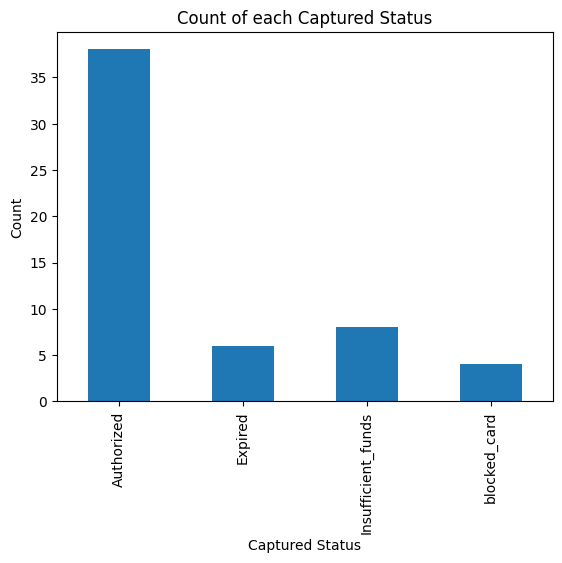

In [38]:
status_counts.plot(kind='bar')
plt.xlabel('Captured Status')
plt.ylabel('Count')
plt.title('Count of each Captured Status')
plt.show()

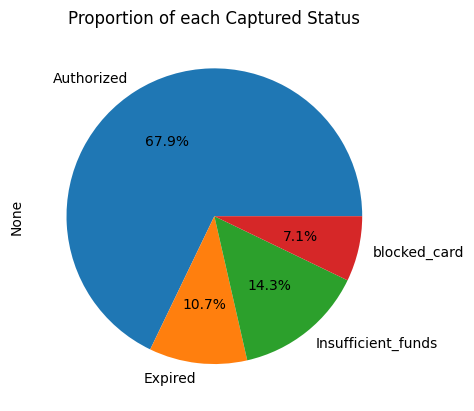

In [39]:
status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of each Captured Status')
plt.show()

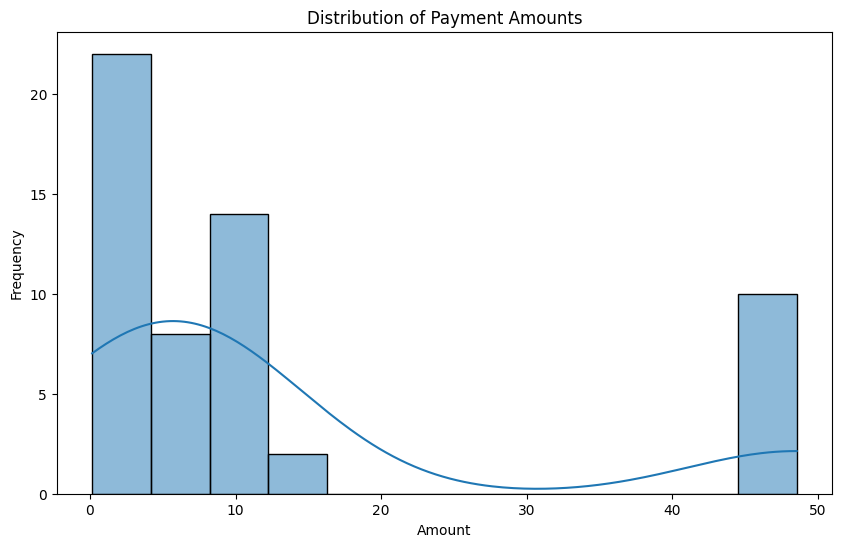

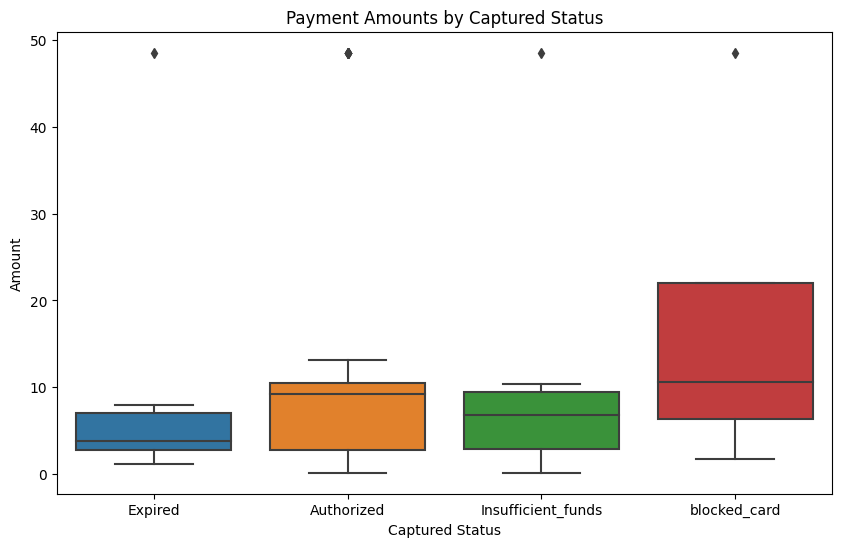

In [41]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=pr, x='Amount', kde=True)
plt.title('Distribution of Payment Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=pr, x='Captured_Status', y='Amount')
plt.title('Payment Amounts by Captured Status')
plt.xlabel('Captured Status')
plt.ylabel('Amount')
plt.show()

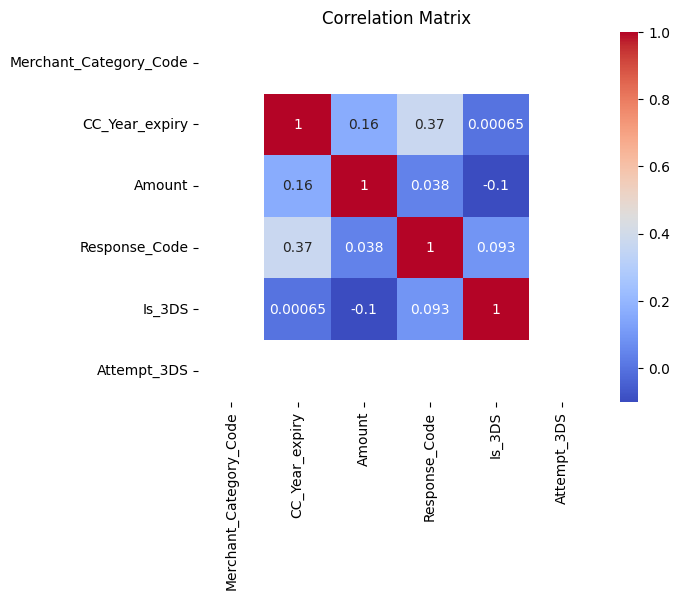

In [42]:
correlation_matrix = pr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

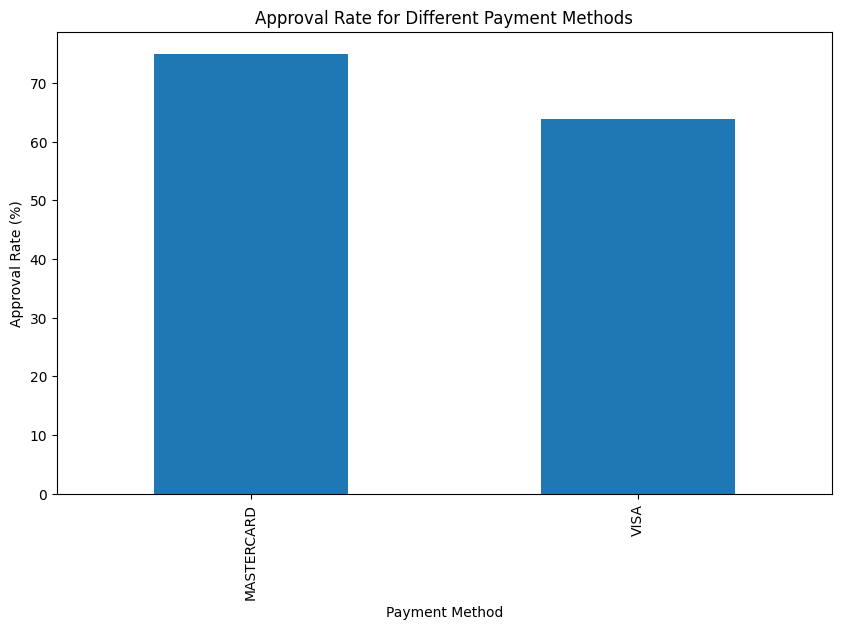

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
pr = pd.read_csv('data.csv')

# Calculate approval rate and decline rate for each payment method
payment_method_approval = pr.groupby('Payment_Method_Name')['Response_Code'].mean() / 10000 * 100
payment_method_decline = 100 - payment_method_approval

# Plot bar chart for approval rates
plt.figure(figsize=(10, 6))
payment_method_approval.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Approval Rate (%)')
plt.title('Approval Rate for Different Payment Methods')
plt.show()


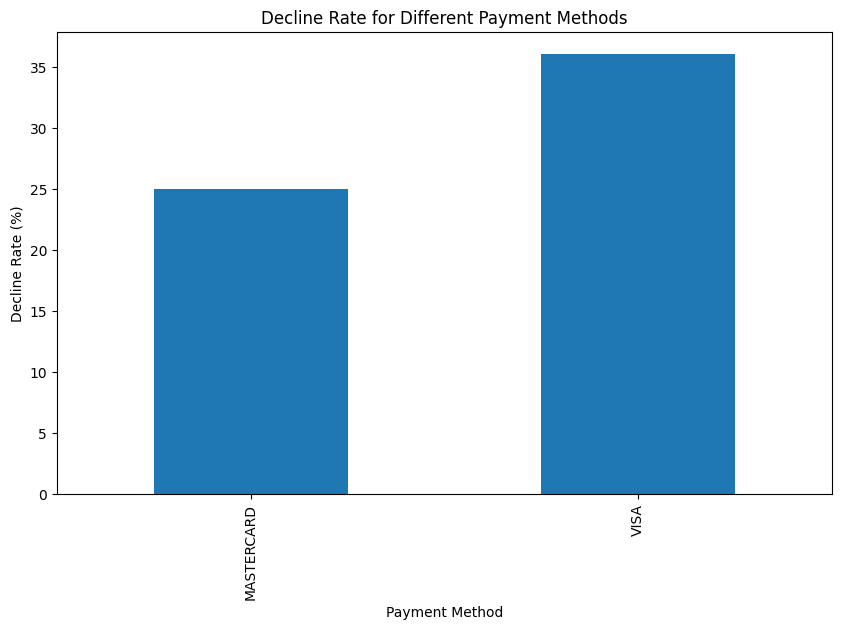

In [53]:
# Plot bar chart for decline rates
plt.figure(figsize=(10, 6))
payment_method_decline.plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Decline Rate (%)')
plt.title('Decline Rate for Different Payment Methods')
plt.show()

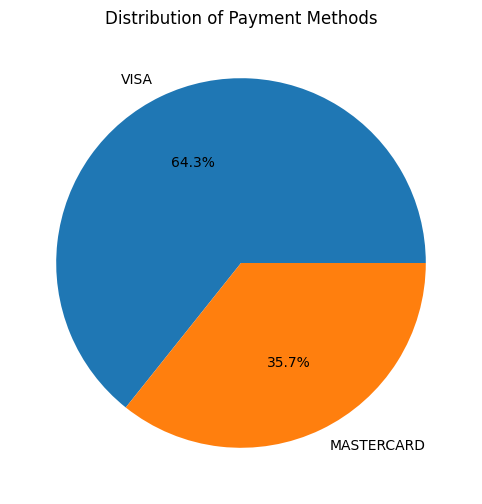

In [54]:
# Plot pie chart for distribution of payment methods
payment_method_counts = pr['Payment_Method_Name'].value_counts()
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

In [62]:
# Read the CSV file
df = pd.read_csv('data.csv')

# Connect 'Response_Description' and 'Captured_Status' columns
df['Reason_for_Decline'] = df['Captured_Status'].where(df['Response_Description'] == 'Declined')

# Display the updated dataframe
print(df[['Captured_Status', 'Response_Description', 'Reason_for_Decline']])


       Captured_Status Response_Description  Reason_for_Decline
0              Expired             Declined             Expired
1           Authorized             Approved                 NaN
2           Authorized             Approved                 NaN
3   Insufficient_funds             Declined  Insufficient_funds
4              Expired             Declined             Expired
5         blocked_card             Declined        blocked_card
6   Insufficient_funds             Declined  Insufficient_funds
7   Insufficient_funds             Declined  Insufficient_funds
8           Authorized             Approved                 NaN
9           Authorized             Approved                 NaN
10          Authorized             Approved                 NaN
11          Authorized             Approved                 NaN
12          Authorized             Approved                 NaN
13          Authorized             Approved                 NaN
14          Authorized             Appro

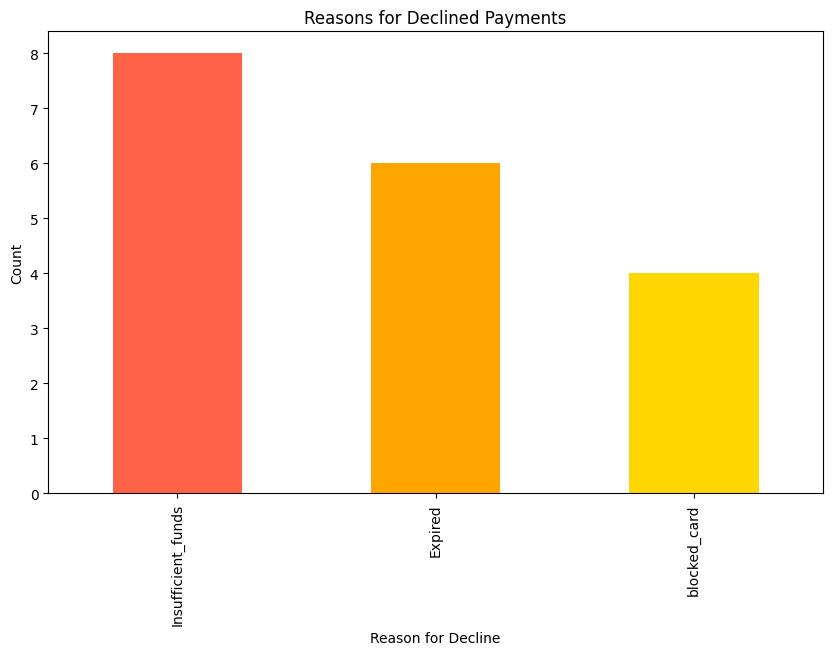

In [64]:
import matplotlib.pyplot as plt

# Connect 'Response_Description' and 'Captured_Status' columns
df['Reason_for_Decline'] = df['Captured_Status'].where(df['Response_Description'] == 'Declined')

# Count the occurrences of each reason for declined payments
reason_counts = df['Reason_for_Decline'].value_counts()

# Define colors for each reason
colors = ['#FF6347', '#FFA500', '#FFD700', '#ADFF2F']

# Plot bar chart for reasons for declined payments with different colors
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar', color=colors)
plt.xlabel('Reason for Decline')
plt.ylabel('Count')
plt.title('Reasons for Declined Payments')
plt.show()

In [65]:
# Filter the data for instances where cards are blocked or flagged
card_blocking_data = df[df['Captured_Status'].isin(['blocked_card'])]

# Calculate approval rate and decline rate for card blocking cases
approval_rate_card_blocking = card_blocking_data['Response_Code'].mean() / 10000 * 100
decline_rate_card_blocking = 100 - approval_rate_card_blocking

# Display the results
print(f"Approval Rate for Card Blocking Cases: {approval_rate_card_blocking:.2f}%")
print(f"Decline Rate for Card Blocking Cases: {decline_rate_card_blocking:.2f}%")


Approval Rate for Card Blocking Cases: 0.00%
Decline Rate for Card Blocking Cases: 100.00%
